# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [160]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay

## Dataset File

In [161]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
df = df[['Survived', 'Age', 'Sex', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Name']]

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col', 'Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked', 'Title'], drop_first=True)

df.drop(['Name'], axis=1, inplace=True)

In [165]:
df.head()

,Survived,Age,Fare,SibSp,Parch,FamilySize,IsAlone,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,22.0,7.2500,1,0,2,0,True,False,True,False,True,False,True,False,False
1,1,38.0,71.2833,1,0,2,0,False,False,False,False,False,False,False,True,False
2,1,26.0,7.9250,0,0,1,1,False,False,True,False,True,True,False,False,False
3,1,35.0,53.1000,1,0,2,0,False,False,False,False,True,False,False,True,False
4,0,35.0,8.0500,0,0,1,1,True,False,True,False,True,False,True,False,False


In [166]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Build and Train a model

In [167]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

get accuracy score

In [168]:
model.score(x_test, y_test)

0.7988826815642458

Use a confusion matrix to see how the model performed during testing

In [169]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[99, 11],
       [25, 44]])

Print the confusion matrix again, but this time use `plot_confusion_matrix` for clarity.

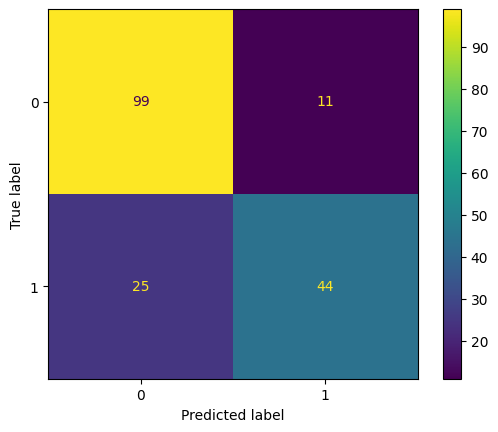

In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

Print a classification report to view precision, recall, and other metrics.

In [216]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



## Use the model to make predictions

Now use the model to predict whether a 30-year-old female traveling in first class will survive the voyage.

In [193]:
# female = [[30, 1, 0, 1, 0, 0]]
# model.predict(female)[0]

## Test File

In [223]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [224]:
dt = dt[['Age', 'Sex', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Name']]

dt['Age'] = dt['Age'].fillna(dt['Age'].median())
dt['Fare'] = dt['Fare'].fillna(dt['Fare'].median())
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])

# feature engineering
dt['FamilySize'] = dt['SibSp'] + dt['Parch'] + 1
dt['IsAlone'] = (dt['FamilySize'] == 1).astype(int)

dt['Title'] = dt['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
dt['Title'] = dt['Title'].replace(['Lady','Countess','Capt','Col', 'Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
dt['Title'] = dt['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

dt = pd.get_dummies(dt, columns=['Sex', 'Pclass', 'Embarked', 'Title'], drop_first=True)

dt.drop(['Name'], axis=1, inplace=True)

Print the confusion matrix again, but this time use `plot_confusion_matrix` for clarity.

In [226]:
dt.head()

,Age,Fare,SibSp,Parch,FamilySize,IsAlone,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,34.5,7.8292,0,0,1,1,True,False,True,True,False,False,True,False,False
1,47.0,7.0000,1,0,2,0,False,False,True,False,True,False,False,True,False
2,62.0,9.6875,0,0,1,1,True,True,False,True,False,False,True,False,False
3,27.0,8.6625,0,0,1,1,True,False,True,False,True,False,True,False,False
4,22.0,12.2875,1,1,3,0,False,False,True,False,True,False,False,True,False


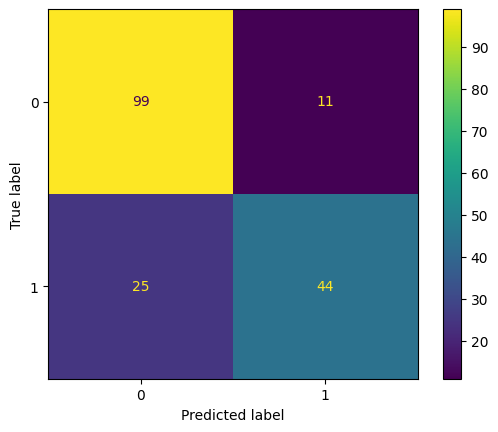

In [227]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

## Sample Submission File

In [228]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [229]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [230]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [214]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

KeyError: 'PassengerId'